In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Abalone Data
https://archive.ics.uci.edu/ml/datasets/Abalone  
<br>
## 연습문제
abalone # 4177건  
7:3 비율로 train set / test set 데이터를 분할(random state=20201005)  
train set -> 모델 -> test set -> 나이를 예측(rings) => rmsle 적용 => 점수 출력  
random forest regressor 이용  
  
min max scaling

In [2]:
abalone=pd.read_csv("abalone.txt", sep=',', header=None, names=['sex', 'length',' diameter',
                                                       'height', 'whole_weight',
                                                       'shucked_weight', 'viscera_weight',
                                                       'shell_weight', 'rings'])

In [3]:
abalone

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2    diameter       4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
# 결측값 확인
np.sum(abalone.isnull())

sex               0
length            0
 diameter         0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

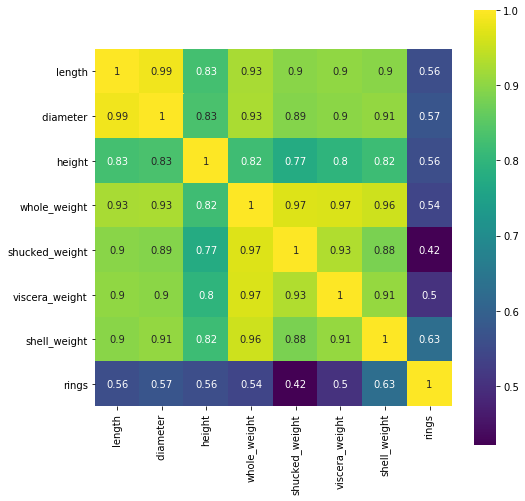

In [6]:
# 상관계수 히트맵  
plt.figure(figsize=(8,8))
sns.heatmap(abalone.corr(), square=True, annot=True, cmap='viridis')

In [7]:
# 나이(rings)와 상관계수가 높은 변수 순으로 정렬
corrMat = abalone.corr()
corrMat.rings.sort_values(ascending=False)[1:]

shell_weight      0.627574
 diameter         0.574660
height            0.557467
length            0.556720
whole_weight      0.540390
viscera_weight    0.503819
shucked_weight    0.420884
Name: rings, dtype: float64

In [8]:
# sex별 개체수 개수
abalone.sex.value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

In [9]:
# sex별 나이 평균
abalone.groupby('sex')['rings'].mean()

sex
F    11.129304
I     7.890462
M    10.705497
Name: rings, dtype: float64

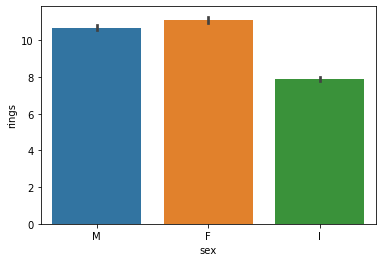

In [10]:
# sex별 나이(rings)평균 시각화
sns.barplot(x='sex', y='rings', data=abalone)

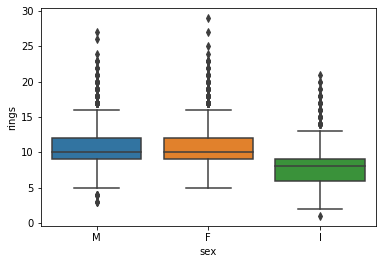

In [11]:
# sex별 나이(rings)평균 & 범위 시각화
sns.boxplot(x='sex',y='rings', data=abalone)

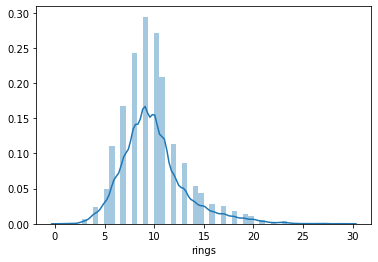

In [12]:
# 전복 나이 분포 시각화
sns.distplot(abalone['rings'])

In [13]:
# 전복 나이 분포도의 왜도와 첨도
print('왜도: %f' % abalone['rings'].skew())
print('첨도: %f' % abalone['rings'].kurt())

왜도: 1.114102
첨도: 2.330687


In [14]:
# 전복 나이(rings) 이상치 제거
num25=np.percentile(abalone['rings'], 25)
num75=np.percentile(abalone['rings'], 75)
iqr=(num75-num25)*1.5
lowest=num25-iqr
highest=num75+iqr

outlier_idx=abalone[(abalone['rings']<lowest) | (abalone['rings']>highest)].index
print(len(outlier_idx)) # 제거하는 이상치 행 개수

abalone=abalone.drop(outlier_idx).reset_index(drop=True)
abalone

278


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
3894,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
3895,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
3896,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
3897,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


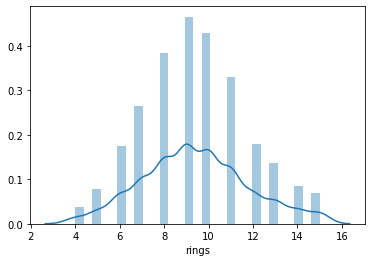

In [15]:
# 전복 나이(rings) 이상치 제거 후 분포도
sns.distplot(abalone['rings'])

In [16]:
# sex 컬럼 변환
abalone['sex']=abalone.sex.map({'M':0, 'F':1, 'I':2})

In [17]:
abalone.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [18]:
# 정규화에 필요한 라이브러리
from sklearn.preprocessing import MinMaxScaler

# RandomForestRegressor 모델에 필요한 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

In [21]:
# MinMaxScaler() 생성 및 피팅
scaler=MinMaxScaler()
scaled=scaler.fit_transform(abalone.drop('rings', axis=1))

In [22]:
# MinMax 표준화 완료된 데이터프레임 생성
abalone_scaled=pd.DataFrame(scaled, columns=['sex', 'length',' diameter', 'height', 
                              'whole_weight','shucked_weight', 'viscera_weight','shell_weight'])

In [23]:
abalone_scaled

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
0,0.0,0.474453,0.486486,0.084071,0.181835,0.148011,0.132324,0.184509
1,0.0,0.321168,0.306306,0.079646,0.077645,0.063722,0.063199,0.083753
2,0.5,0.583942,0.585586,0.119469,0.240701,0.169589,0.185648,0.260076
3,0.0,0.452555,0.486486,0.110619,0.182557,0.141942,0.149440,0.190806
4,1.0,0.291971,0.288288,0.070796,0.070242,0.056979,0.051350,0.064861
...,...,...,...,...,...,...,...,...
3894,0.5,0.635036,0.639640,0.146018,0.316540,0.246123,0.314022,0.309194
3895,0.0,0.671533,0.621622,0.119469,0.345070,0.292650,0.281764,0.323678
3896,0.0,0.686131,0.684685,0.181416,0.420910,0.350978,0.377880,0.383501
3897,0.5,0.722628,0.702703,0.132743,0.391477,0.354686,0.342989,0.368388


In [24]:
# x, y 구분
x=abalone_scaled
y=np.ravel(abalone.rings)

In [26]:
# x
y

array([15,  7,  9, ...,  9, 10, 12], dtype=int64)

In [27]:
params={'n_estimators':[50, 100, 300],
      'max_depth': [5, 10, 50],
      'min_samples_split': [2, 5, 10]}

In [28]:
# train, test 데이터 분리
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=20201005)

In [29]:
xTrain.shape, yTrain.shape

((2729, 8), (2729,))

In [30]:
xTest.shape, yTest.shape

((1170, 8), (1170,))

In [31]:
# 모델 생성
rfr = RandomForestRegressor(random_state=20201005, n_jobs=-1)

In [32]:
# GridSearchCV 생성
gridCV=GridSearchCV(rfr, param_grid=params, cv=5, n_jobs=-1)

In [33]:
# GridSearchCV 피팅
gridCV.fit(xTrain, yTrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False,
                                             random_state=20201005, verbose=0,
                                             warm_st

In [34]:
# best parameters 출력
gridCV.best_params_

{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}

In [35]:
# best score 출력
gridCV.best_score_

0.5501815575843422

In [36]:
# best parameters 대입한 모델 생성
model = RandomForestRegressor(n_estimators=300,
                             max_depth=10,
                             min_samples_split=10,
                             random_state=20201005)

In [37]:
# 모델 피팅
model.fit(xTrain, yTrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=20201005, verbose=0, warm_start=False)

In [38]:
# test데이터 예측
ypred=model.predict(xTest)

In [39]:
ypred

array([ 7.92678571, 10.18911472, 13.2004818 , ..., 11.58483049,
        8.88812583, 10.39300166])

In [40]:
# rmsle 관련 라이브러리 & 함수 정의
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)

    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)

    difference = log_predict - log_actual
    difference = np.square(difference)

    mean_difference = difference.mean()

    score = np.sqrt(mean_difference)

    return score

In [41]:
# rmsle 생성
rmsle_scorer=make_scorer(rmsle)

In [42]:
# 모델 평가를 위한 라이브러리
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [43]:
kfold=KFold(n_splits=10, shuffle=True, random_state=20201005)

In [44]:
score = cross_val_score(model, xTrain, yTrain,
                       cv=kfold, scoring=rmsle_scorer)

In [45]:
# 결과
score.mean()

0.14802534034730958

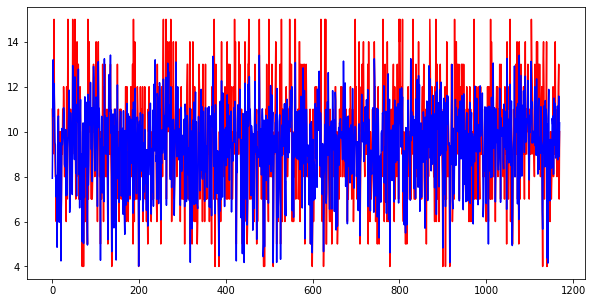

In [47]:
# 예측과 실제값 비교 그래프
plt.figure(figsize=(10,5))
plt.plot(yTest, color='red')
plt.plot(ypred, color='blue')